In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from src.utils import get_wandb_summaries
from src.visualization.visualize import bars_with_labels_and_errors
import numpy as np

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
runs = [
        # "1szazbm1",
        "19h7xs81",

        "20gczthf",
        # "3g83xe10",
        "1ke6xden",
        # "301fj0y2",
        "1x254xwv",
        "289402rh",
        "2911eip8",
        # "2czots5t",
        "21ebfhh3",
        "23qp4fss",
        "2ix8tob4",
        # "1e5ddrbv",
        "7r8nxjo5",
        "z0nbehr0",
        "2ncle1v9",
        "3ss14njj",
        "1apcb94k", # CNN Models
        "ko9zy18b",
        "2irztt2o",
        "27eeg42m",
        "9kq7490z",
        "eq4g39ub", # More CNN Transformer
        "1g7it1lr"
    ]
    
summaries = get_wandb_summaries(runs)

In [14]:
summaries_df = pd.DataFrame(summaries)
summaries_df["multitask"] = summaries_df["command"].str.contains("pretrained_predict_daily_features.ckpt")

is_multitask = summaries_df[summaries_df["multitask"]]
summaries_df.loc[summaries_df["multitask"],"model"] = is_multitask["model"] + " - Daily Features Multitask"

summaries_df["test/roc_ci"] = list(zip(summaries_df['test/roc_auc_ci_low'], summaries_df['test/roc_auc_ci_high']))

In [15]:
summaries_df.columns

Index(['test/pr_auc', '_wandb', '_runtime', 'eval/roc_auc', 'test/roc_auc',
       'train/roc_auc', 'test/roc_auc_ci_low', 'test/roc_auc_ci_high',
       'test/pr_auc_ci_high', 'task', '_step', 'model', '_timestamp',
       'test/support', 'test_predictions', 'feature_importance',
       'test/pr_auc_ci_low', 'command', 'id', 'eval/roc_table',
       'test/det_table', 'train/det_table', 'eval/roc_auc_ci_low',
       'eval/det_table', 'train/pr_auc', 'test/loss_epoch', 'test/best_pr_auc',
       'eval/pr_auc_ci_high', 'lr-Adam', 'epoch', 'eval/pr_auc',
       'train/best_pr_auc', 'test/pr_table', 'train/roc_table',
       'eval/loss_epoch', 'eval/best_roc_auc', 'train/best_roc_auc',
       'trainer/global_step', 'eval/roc_auc_ci_high', 'train/loss',
       'eval/loss_step', 'test/loss_step', 'train/pr_table',
       'test/best_roc_auc', 'eval/pr_auc_ci_low', 'eval/pr_table',
       'test/roc_table', 'eval/best_pr_auc', 'test/loss', 'multitask',
       'test/roc_ci'],
      dtype='object

In [16]:
manual_adjustments = {
    "3ss14njj":[("multitask",True),("task","PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")]
}
for run_id, changes in manual_adjustments.items():
    for k,v in changes:
        summaries_df.loc[summaries_df["id"] == run_id,k] = v



OLD_TASK_NAMES = [ 'PredictFluPos',
                  'PredictSurveyCol-have_flu > 0', 
                 'PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0',
                 'PredictSurveyCol-symptom_severity__fever_q_3 > 0 | symptom_severity__fever_q_2 > 0',
                 'PredictSurveyCol-(symptom_severity__q_fatigue_2 > 0) | (symptom_severity__q_fatigue_3 > 0)']

NEW_TASK_NAMES = [ 'Flu Positivity',
                  'Two or More\nFlu Symptoms',
                  'Severe Cough',
                  'Severe Fever',
                  'Severe Fatigue']

task_name_map = dict(zip(OLD_TASK_NAMES,NEW_TASK_NAMES))
summaries_df["task"] = summaries_df["task"].map(task_name_map)


summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [17]:
summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [18]:

all_categories = pd.MultiIndex.from_product([summaries_df["task"].unique(),summaries_df["model"].unique()], names=('task','model'))
summaries_df = summaries_df.set_index(["task","model"])
summaries_df = summaries_df.reindex(all_categories).reset_index()

In [19]:
summaries_df

,task,model,test/pr_auc,_wandb,_runtime,eval/roc_auc,test/roc_auc,train/roc_auc,test/roc_auc_ci_low,test/roc_auc_ci_high,...,test/best_roc_auc,eval/pr_auc_ci_low,eval/pr_table,test/roc_table,eval/best_pr_auc,test/loss,multitask,test/roc_ci,roc_ci,pr_ci
0,Severe Fatigue,XGBoost,0.032206,{'runtime': 420},422,0.706449,0.707549,0.737818,0.691462,0.723507,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6914617368640869, 0.7235068701632916)",0.016087,0.007638
1,Severe Fatigue,CNNToTransformerEncoder - Daily Features Multi...,0.072978,{'runtime': 29411},29368,0.726669,0.759502,0.834527,0.743504,0.775500,...,0.759502,0.031703,{'path': 'media/table/eval/pr_table_3624_bc921...,"{'ncols': 3, 'nrows': 9999, 'sha256': 'c480c4d...",0.033523,NaN,True,"(0.7435042858123779, 0.7755002379417419)",0.015998,0.016189
2,Severe Fatigue,CNNToTransformerEncoder,0.038365,{'runtime': 31910},31863,0.668750,0.712649,0.874030,0.694916,0.730383,...,0.712649,0.020373,"{'size': 2807, '_type': 'table-file', 'ncols':...","{'_type': 'table-file', 'ncols': 3, 'nrows': 9...",0.021685,NaN,False,"(0.6949158310890198, 0.7303827404975891)",0.017733,0.008115
3,Severe Fatigue,CNN,NaN,NaN,38754,0.661377,NaN,0.845194,NaN,NaN,...,NaN,0.017923,{'path': 'media/table/eval/pr_table_4168_34c35...,NaN,0.018861,NaN,False,"(nan, nan)",NaN,NaN
4,Severe Fever,XGBoost,0.013313,{'runtime': 403},404,0.716579,0.740792,0.806051,0.705326,0.774476,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.7053255932119042, 0.7744761940195568)",0.035466,0.006005
5,Severe Fever,CNNToTransformerEncoder - Daily Features Multi...,0.055598,{'runtime': 34582},34541,0.766600,0.813954,0.935254,0.780408,0.847500,...,0.813954,0.028935,{'artifact_path': 'wandb-client-artifact://fgf...,{'path': 'media/table/test/roc_table_3681_e90e...,0.033269,NaN,True,"(0.7804077863693237, 0.8474999070167542)",0.033546,0.024030
6,Severe Fever,CNNToTransformerEncoder,0.039241,{'runtime': 39585},39578,0.750981,0.789822,0.940995,0.745148,0.834496,...,0.789822,0.018794,{'sha256': '46d2c6723db632d55a917c1ad9d12eb8da...,"{'size': 539388, '_type': 'table-file', 'ncols...",0.021451,0.010486,False,"(0.7451478838920593, 0.834496021270752)",0.044674,0.020068
7,Severe Fever,CNN,0.047576,{'runtime': 11},14528,0.702085,0.800785,0.852371,0.763206,0.838363,...,0.800785,0.004964,"{'ncols': 3, 'nrows': 51, 'sha256': '5bc769388...",NaN,0.005576,0.010131,False,"(0.7632064819335938, 0.8383626937866211)",0.037578,0.027152
8,Two or More\nFlu Symptoms,XGBoost,0.044323,{'runtime': 405},407,0.637857,0.647025,0.650249,0.636278,0.657473,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6362778317460756, 0.6574727516954003)",0.010747,0.005110
9,Two or More\nFlu Symptoms,CNNToTransformerEncoder - Daily Features Multi...,0.065424,{'runtime': 48227},48172,0.662854,0.669866,0.799689,0.658944,0.680787,...,0.669866,0.047414,{'_latest_artifact_path': 'wandb-client-artifa...,{'sha256': '244db6b201f08334bbdf80148a3fc52727...,0.048992,NaN,True,"(0.6589442491531372, 0.6807874441146851)",0.010922,0.007897


In [20]:
OLD_MODEL_NAMES = ["XGBoost",
               "CNN",
               "CNNToTransformerEncoder",
               "CNNToTransformerEncoder - Daily Features Multitask",
]

NEW_MODEL_NAMES = [
    "XGBoost",
    "CNN",
    "CNN-Transformer",
    "Our Model",
]
model_name_map = dict(zip(OLD_MODEL_NAMES,NEW_MODEL_NAMES))
model_order_map = lambda x: NEW_MODEL_NAMES.index(x)
summaries_df["model_clean"] = summaries_df["model"].map(model_name_map)
summaries_df = summaries_df.sort_values(by="model_clean",key=lambda x: x.map(model_order_map))

In [21]:

metrics = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["test/pr_auc","test/roc_auc"], value_name="metric_val")

pr_cis = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["pr_ci"], value_name="ci")
pr_cis["variable"] = "test/pr_auc"

roc_cis = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["roc_ci"], value_name="ci")
roc_cis["variable"] = "test/roc_auc"
cis = pd.concat([pr_cis,roc_cis])

metrics = pd.merge(metrics,cis)
metrics["variable"] = metrics["variable"].map({"test/roc_auc":"ROC AUC",
                                            "test/pr_auc": "PR AUC"})

/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


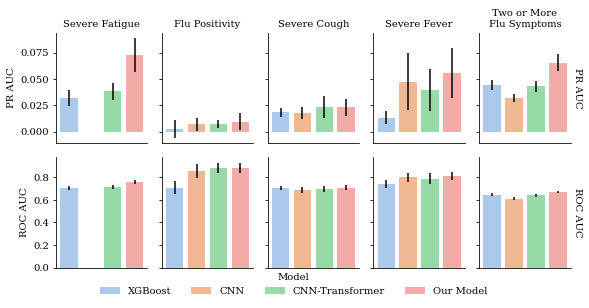

In [22]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
def add_error_bars(x,y,errors,**kwargs):
    plt.errorbar(x,y,yerr=errors, color="black")
    
with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    g = (sns.FacetGrid(metrics, col="task",row="variable", hue= "model_clean", height=2, aspect=0.3, palette="pastel",
                    sharey="row", margin_titles=True)
        .map(sns.barplot,'model_clean','metric_val', order=NEW_MODEL_NAMES)
        .map(add_error_bars,'model_clean','metric_val',"ci")
        .set_titles(col_template="{col_name}", row_template="{row_name}")
        .set_axis_labels("", "")
        .set_xticklabels("")
        .set(xticks=[])
        .add_legend(loc='center',bbox_to_anchor=(.5, 0.0),ncol=len(NEW_MODEL_NAMES),title="Model", shadow=True))

    g.axes[0][0].set_ylabel("PR AUC")
    g.axes[1][0].set_ylabel("ROC AUC")
    [x.set_ylabel("PR AUC") for x in g.axes[1]]
    plt.tight_layout()